### Dogs vs cats using fast ai v3

I wanted to make this notebook as a reference for end to end submission to the competition.
Finetuning is yet to be done.

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 5GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/dogs-vs-cats-redux-kernels-edition/sample_submission.csv
/kaggle/input/dogs-vs-cats-redux-kernels-edition/test.zip
/kaggle/input/dogs-vs-cats-redux-kernels-edition/train.zip


### Unzip files and put them in path

In [2]:
from fastai.vision import *

In [3]:
Config.data_path()

PosixPath('/root/.fastai/data')

In [4]:
path = Config.data_path()/'dogs_vs_cats'
path.mkdir(parents=True, exist_ok=True)
path

PosixPath('/root/.fastai/data/dogs_vs_cats')

In [5]:
# unzip test and train to path
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        if ('zip' in filename):
            file = os.path.join(dirname, filename)
            !unzip -q -n {file} -d {path}

In [6]:
!dir {path}

test  train


In [7]:
!dir {path}/'train'

# observation: we can use the first part of the file name before the dot to extract the labels

cat.0.jpg      cat.3248.jpg  cat.7749.jpg   dog.12247.jpg  dog.5499.jpg
cat.1.jpg      cat.3249.jpg  cat.775.jpg    dog.12248.jpg  dog.55.jpg
cat.10.jpg     cat.325.jpg   cat.7750.jpg   dog.12249.jpg  dog.550.jpg
cat.100.jpg    cat.3250.jpg  cat.7751.jpg   dog.1225.jpg   dog.5500.jpg
cat.1000.jpg   cat.3251.jpg  cat.7752.jpg   dog.12250.jpg  dog.5501.jpg
cat.10000.jpg  cat.3252.jpg  cat.7753.jpg   dog.12251.jpg  dog.5502.jpg
cat.10001.jpg  cat.3253.jpg  cat.7754.jpg   dog.12252.jpg  dog.5503.jpg
cat.10002.jpg  cat.3254.jpg  cat.7755.jpg   dog.12253.jpg  dog.5504.jpg
cat.10003.jpg  cat.3255.jpg  cat.7756.jpg   dog.12254.jpg  dog.5505.jpg
cat.10004.jpg  cat.3256.jpg  cat.7757.jpg   dog.12255.jpg  dog.5506.jpg
cat.10005.jpg  cat.3257.jpg  cat.7758.jpg   dog.12256.jpg  dog.5507.jpg
cat.10006.jpg  cat.3258.jpg  cat.7759.jpg   dog.12257.jpg  dog.5508.jpg
cat.10007.jpg  cat.3259.jpg  cat.776.jpg    dog.12258.jpg  dog.5509.jpg
cat.10008.jpg  cat.326.jpg   cat.7760.jpg   dog.12259.jpg  dog.551.

cat.11357.jpg  cat.4608.jpg  cat.9108.jpg   dog.2358.jpg   dog.6859.jpg
cat.11358.jpg  cat.4609.jpg  cat.9109.jpg   dog.2359.jpg   dog.686.jpg
cat.11359.jpg  cat.461.jpg   cat.911.jpg    dog.236.jpg    dog.6860.jpg
cat.1136.jpg   cat.4610.jpg  cat.9110.jpg   dog.2360.jpg   dog.6861.jpg
cat.11360.jpg  cat.4611.jpg  cat.9111.jpg   dog.2361.jpg   dog.6862.jpg
cat.11361.jpg  cat.4612.jpg  cat.9112.jpg   dog.2362.jpg   dog.6863.jpg
cat.11362.jpg  cat.4613.jpg  cat.9113.jpg   dog.2363.jpg   dog.6864.jpg
cat.11363.jpg  cat.4614.jpg  cat.9114.jpg   dog.2364.jpg   dog.6865.jpg
cat.11364.jpg  cat.4615.jpg  cat.9115.jpg   dog.2365.jpg   dog.6866.jpg
cat.11365.jpg  cat.4616.jpg  cat.9116.jpg   dog.2366.jpg   dog.6867.jpg
cat.11366.jpg  cat.4617.jpg  cat.9117.jpg   dog.2367.jpg   dog.6868.jpg
cat.11367.jpg  cat.4618.jpg  cat.9118.jpg   dog.2368.jpg   dog.6869.jpg
cat.11368.jpg  cat.4619.jpg  cat.9119.jpg   dog.2369.jpg   dog.687.jpg
cat.11369.jpg  cat.462.jpg   cat.912.jpg    dog.237.jpg    dog.687

cat.11655.jpg  cat.4906.jpg  cat.9406.jpg   dog.2656.jpg   dog.7156.jpg
cat.11656.jpg  cat.4907.jpg  cat.9407.jpg   dog.2657.jpg   dog.7157.jpg
cat.11657.jpg  cat.4908.jpg  cat.9408.jpg   dog.2658.jpg   dog.7158.jpg
cat.11658.jpg  cat.4909.jpg  cat.9409.jpg   dog.2659.jpg   dog.7159.jpg
cat.11659.jpg  cat.491.jpg   cat.941.jpg    dog.266.jpg    dog.716.jpg
cat.1166.jpg   cat.4910.jpg  cat.9410.jpg   dog.2660.jpg   dog.7160.jpg
cat.11660.jpg  cat.4911.jpg  cat.9411.jpg   dog.2661.jpg   dog.7161.jpg
cat.11661.jpg  cat.4912.jpg  cat.9412.jpg   dog.2662.jpg   dog.7162.jpg
cat.11662.jpg  cat.4913.jpg  cat.9413.jpg   dog.2663.jpg   dog.7163.jpg
cat.11663.jpg  cat.4914.jpg  cat.9414.jpg   dog.2664.jpg   dog.7164.jpg
cat.11664.jpg  cat.4915.jpg  cat.9415.jpg   dog.2665.jpg   dog.7165.jpg
cat.11665.jpg  cat.4916.jpg  cat.9416.jpg   dog.2666.jpg   dog.7166.jpg
cat.11666.jpg  cat.4917.jpg  cat.9417.jpg   dog.2667.jpg   dog.7167.jpg
cat.11667.jpg  cat.4918.jpg  cat.9418.jpg   dog.2668.jpg   dog.71

cat.12208.jpg  cat.546.jpg   cat.9960.jpg   dog.3209.jpg   dog.771.jpg
cat.12209.jpg  cat.5460.jpg  cat.9961.jpg   dog.321.jpg    dog.7710.jpg
cat.1221.jpg   cat.5461.jpg  cat.9962.jpg   dog.3210.jpg   dog.7711.jpg
cat.12210.jpg  cat.5462.jpg  cat.9963.jpg   dog.3211.jpg   dog.7712.jpg
cat.12211.jpg  cat.5463.jpg  cat.9964.jpg   dog.3212.jpg   dog.7713.jpg
cat.12212.jpg  cat.5464.jpg  cat.9965.jpg   dog.3213.jpg   dog.7714.jpg
cat.12213.jpg  cat.5465.jpg  cat.9966.jpg   dog.3214.jpg   dog.7715.jpg
cat.12214.jpg  cat.5466.jpg  cat.9967.jpg   dog.3215.jpg   dog.7716.jpg
cat.12215.jpg  cat.5467.jpg  cat.9968.jpg   dog.3216.jpg   dog.7717.jpg
cat.12216.jpg  cat.5468.jpg  cat.9969.jpg   dog.3217.jpg   dog.7718.jpg
cat.12217.jpg  cat.5469.jpg  cat.997.jpg    dog.3218.jpg   dog.7719.jpg
cat.12218.jpg  cat.547.jpg   cat.9970.jpg   dog.3219.jpg   dog.772.jpg
cat.12219.jpg  cat.5470.jpg  cat.9971.jpg   dog.322.jpg    dog.7720.jpg
cat.1222.jpg   cat.5471.jpg  cat.9972.jpg   dog.3220.jpg   dog.772

In [8]:
train_path = path/'train'
test_path = path/'test'

In [9]:
from fastai.metrics import error_rate
np.random.seed(42)

### Fnames

In [10]:
fnames = get_image_files(train_path)
fnames[:5]

[PosixPath('/root/.fastai/data/dogs_vs_cats/train/dog.890.jpg'),
 PosixPath('/root/.fastai/data/dogs_vs_cats/train/dog.1178.jpg'),
 PosixPath('/root/.fastai/data/dogs_vs_cats/train/dog.7845.jpg'),
 PosixPath('/root/.fastai/data/dogs_vs_cats/train/dog.4632.jpg'),
 PosixPath('/root/.fastai/data/dogs_vs_cats/train/cat.3660.jpg')]

### Creating image databunch from lists

In [11]:
categories = []
filenames = os.listdir(train_path)

for filename in filenames:
    if('dog.' in filename):
        categories.append(1)
    else:
        categories.append(0)

# 1 for dogs
# 0 for cats

In [12]:
import warnings
warnings.filterwarnings('ignore')

In [13]:
data = ImageDataBunch.from_lists(train_path, fnames, ds_tfms=get_transforms(), size=224, bs=64, labels=categories)

In [14]:
data.classes

[0, 1]

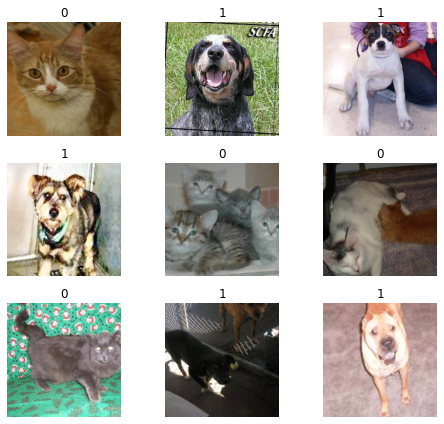

In [15]:
data.show_batch(rows=3,figsize=(7,6))

### Using a CNN

In [34]:
learn = cnn_learner(data, models.resnet50, metrics=error_rate)
# changing model to resnet50
# it can be run with resnet34 also for faster results

Downloading: "https://download.pytorch.org/models/resnet50-19c8e357.pth" to /root/.cache/torch/checkpoints/resnet50-19c8e357.pth


In [35]:
learn.fit_one_cycle(4)
# PIL.UnidentifiedImageError: cannot identify image file '/root/.fastai/data/dogs_vs_cats/train/dog.2370.jpg'

epoch,train_loss,valid_loss,error_rate,time
0,0.089012,0.040935,0.013600,04:45
1,0.057701,0.027581,0.010200,04:42
2,0.035813,0.021272,0.007600,04:36
3,0.024258,0.018819,0.007000,04:41


In [36]:
#learn.save('stage1-dogsvscats')
learn.save('stage2-resnet50')

### finetuning



In [29]:
#interp = ClassificationInterpretation.from_learner(learn)
#losses, idxs = interp.top_losses()

In [30]:
#interp.most_confused(min_val=2)

[(0, 1, 23), (1, 0, 21)]

In [31]:
#learn.load('stage1-dogsvscats')

Learner(data=ImageDataBunch;

Train: LabelList (20000 items)
x: ImageList
Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224)
y: CategoryList
1,1,1,1,0
Path: /root/.fastai/data/dogs_vs_cats/train;

Valid: LabelList (5000 items)
x: ImageList
Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224)
y: CategoryList
1,1,1,0,1
Path: /root/.fastai/data/dogs_vs_cats/train;

Test: None, model=Sequential(
  (0): Sequential(
    (0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace=True)
    (3): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (4): Sequential(
      (0): BasicBlock(
        (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=T

In [32]:
#learn.lr_find()

epoch,train_loss,valid_loss,error_rate,time


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


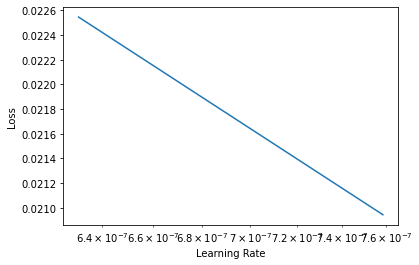

In [33]:
#learn.recorder.plot()
# this doesn't look right

In [ ]:
#learn.unfreeze()

In [ ]:
#learn.fit_one_cycle(2, max_lr=slice(1e-6,1e-4))

### Getting test data

In [38]:
test_images = get_image_files(test_path)
test_images[:5]

[PosixPath('/root/.fastai/data/dogs_vs_cats/test/10435.jpg'),
 PosixPath('/root/.fastai/data/dogs_vs_cats/test/6790.jpg'),
 PosixPath('/root/.fastai/data/dogs_vs_cats/test/4644.jpg'),
 PosixPath('/root/.fastai/data/dogs_vs_cats/test/1835.jpg'),
 PosixPath('/root/.fastai/data/dogs_vs_cats/test/1102.jpg')]

In [39]:
submission = pd.DataFrame(os.listdir(test_path), columns=['ids'])
submission['label'] = 0
submission['id'] = 1

### Prediction

In [ ]:
count = 0
for imgpath in test_images:
    img = open_image(imgpath)
    pred = learn.predict(img)
    if(str(pred[0]) != '1'):
        submission['label'][count] = 0
    else:
        submission['label'][count] = 1
    count = count +1


### Submission

In [ ]:
submission

In [ ]:
count = 0
for imgpath in test_images:
    submission['id'][count] = count + 1
    count  = count + 1

In [ ]:
submission[['id', 'label']].to_csv('submission.csv', index=False)

In [25]:
!dir /kaggle/working

__notebook_source__.ipynb  submission.csv


In [26]:
#!mv outputs.csv /kaggle/working

In [28]:
learn.export(file = Path("/kaggle/working/resnet50.pkl"))